In [1]:
# Import pyproteome and initialize other packages
from pyproteome import *
%import_all

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Set location of .msf data directory
paths.MS_SEARCHED_NAME = "CK Searched"
paths.set_base_dir(paths.find_base_dir())

# Specify sample IDs assigned to each TMT channel
ckh_channels = OrderedDict(
    [
        ("3130 CK Hip",     "126"),
        ("3131 CK-p25 Hip", "127"),
        ("3145 CK-p25 Hip", "128"),
        ("3146 CK-p25 Hip", "129"),
        ("3148 CK Hip",     "130"),
        ("3157 CK Hip",     "131"),
    ]
)
ckx_channels = OrderedDict(
    [
        ("3130 CK Cortex",     "126"),
        ("3131 CK-p25 Cortex", "127"),
        ("3145 CK-p25 Cortex", "128"),
        ("3146 CK-p25 Cortex", "129"),
        ("3148 CK Cortex",     "130"),
        ("3157 CK Cortex",     "131"),
    ]
)

# Specify sample-group assignment
ckp25_groups = OrderedDict(
    [
        (
            "CK Hip",
            [
                "3130 CK Hip",
                "3148 CK Hip",
                "3157 CK Hip",
            ],
        ),
        (
            "CK-p25 Hip",
            [
                "3131 CK-p25 Hip",
                "3145 CK-p25 Hip",
                "3146 CK-p25 Hip",
            ],
        ),
        (
            "CK Cortex",
            [
                "3130 CK Cortex",
                "3148 CK Cortex",
                "3157 CK Cortex",
            ],
        ),
        (
            "CK-p25 Cortex",
            [
                "3131 CK-p25 Cortex",
                "3145 CK-p25 Cortex",
                "3146 CK-p25 Cortex",
            ],
        ),
    ]
)

# Normalize across Hippocampus and Cortex using respective CK Control
cmp_groups = [
    ("CK Hip", "CK-p25 Hip"),
    ("CK Cortex", "CK-p25 Cortex"),
]

# Disease Groups
ck_groups = [
    "CK-p25 Hip", "CK-p25 Cortex",
]

# Wild-type Groups
wt_groups = [
    "CK Hip", "CK Cortex",
]

05:33:12 PM	pyproteome.discoverer	INFO	CK-H1-Global: Loading ProteomeDiscoverer peptides...
05:33:12 PM	pyproteome.discoverer	INFO	CK-H1-Global: -- Reassigned 21 phosphosites using phosphoRS
05:33:13 PM	pyproteome.discoverer	INFO	CK-H1-Global: Loaded 720 peptides
05:33:13 PM	pyproteome.data_sets	WARNING	CK-H1-Global: Unable to locate raw file for 2018-03-14-CKH1-sup10-pre125-col92.raw
05:33:13 PM	pyproteome.data_sets	INFO	CK-H1-Global: Data Set Statistics:
05:33:13 PM	pyproteome.data_sets	INFO	CK-H1-Global: -- 46 pY - 226 pST (32% phospho specificity)
05:33:13 PM	pyproteome.data_sets	INFO	CK-H1-Global: -- 720 total peptides - 611 unique proteins
05:33:13 PM	pyproteome.data_sets	INFO	CK-H1-Global: -- 52% of phosphopeptides have an ambiguous assignment
05:33:13 PM	pyproteome.data_sets	INFO	CK-H1-Global: -- 71% labeled - 22% underlabeled
05:33:13 PM	pyproteome.data_sets	INFO	CK-H1-Global: -- 0.7 mean missed cleavages
05:33:13 PM	pyproteome.data_sets	INFO	CK-H1-Global: Filtering peptides u

OrderedDict([('CK-H1-Global',
              <pyproteome.data_sets.data_set.DataSet at 0x2085ee2d128>),
             ('CK-H1-MPM2',
              <pyproteome.data_sets.data_set.DataSet at 0x2085ee2d160>),
             ('CK-H1-pST',
              <pyproteome.data_sets.data_set.DataSet at 0x2085f315278>),
             ('CK-H1-pY',
              <pyproteome.data_sets.data_set.DataSet at 0x2085f76b198>),
             ('CK-H2-Global',
              <pyproteome.data_sets.data_set.DataSet at 0x20860c3b8d0>),
             ('CK-H2-MPM2',
              <pyproteome.data_sets.data_set.DataSet at 0x208611f2c18>),
             ('CK-H2-pY',
              <pyproteome.data_sets.data_set.DataSet at 0x2086138e630>),
             ('CK-X1-Global',
              <pyproteome.data_sets.data_set.DataSet at 0x208612ca978>),
             ('CK-X1-MAPKCDK',
              <pyproteome.data_sets.data_set.DataSet at 0x208612e3908>),
             ('CK-X11-Global',
              <pyproteome.data_sets.data_set.DataSet at 

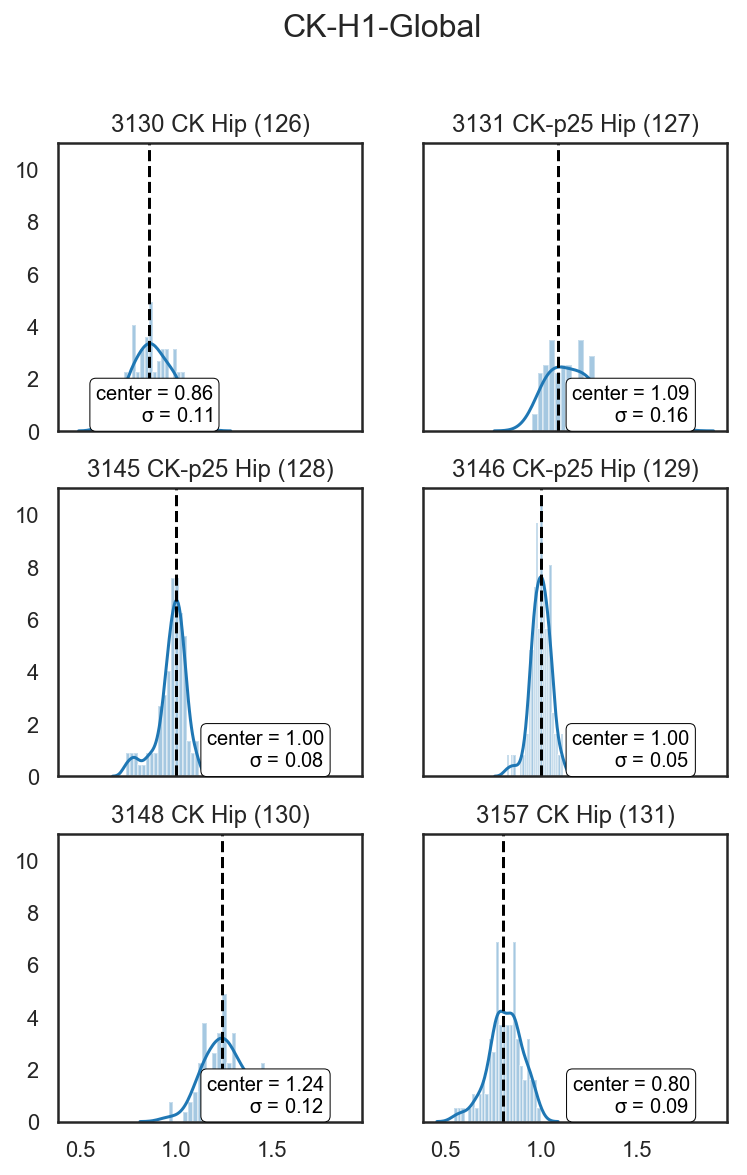

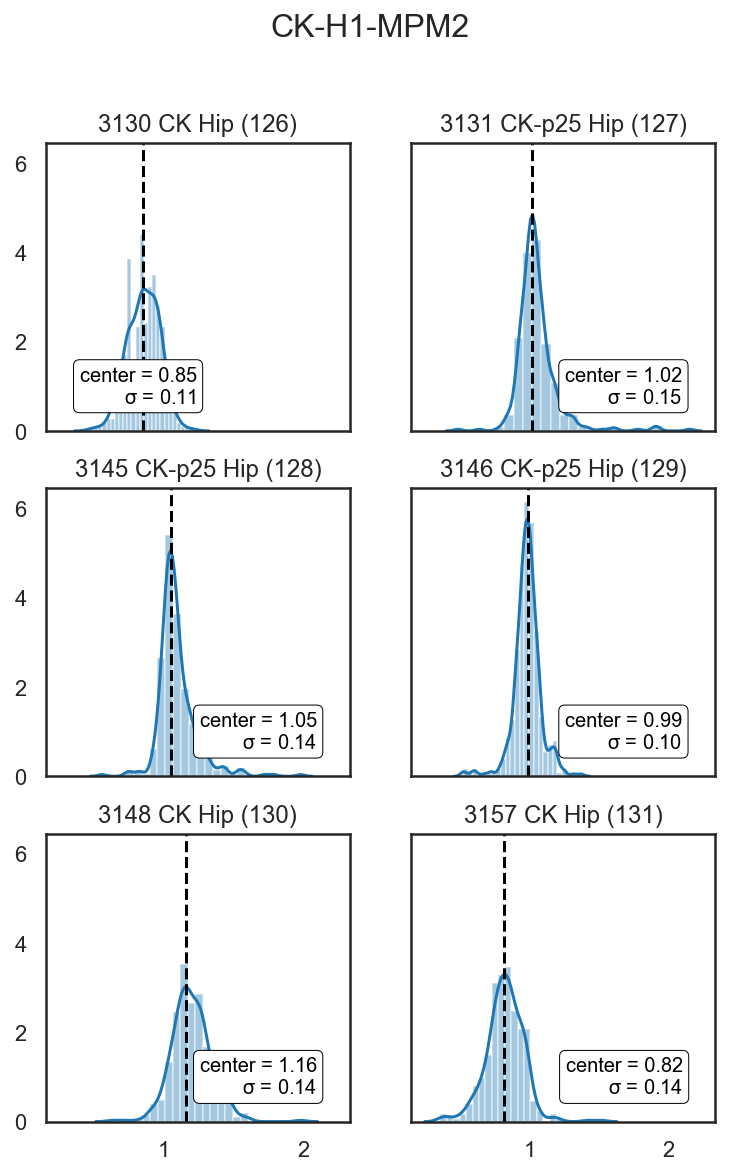

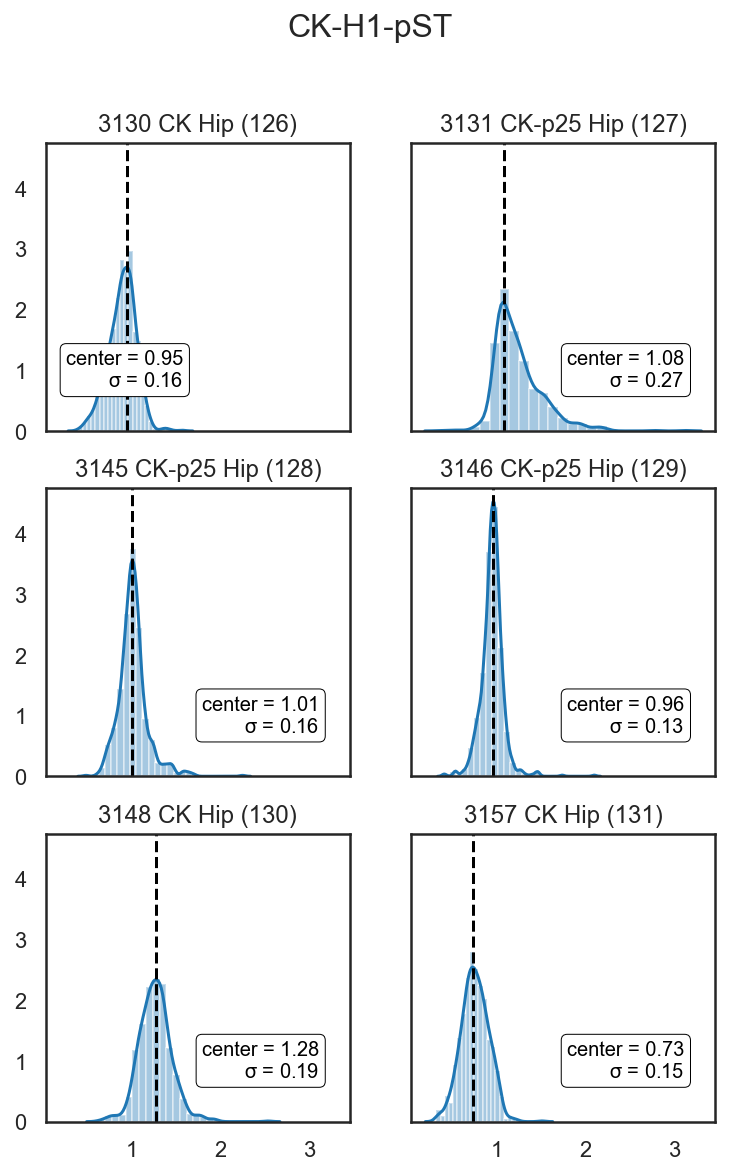

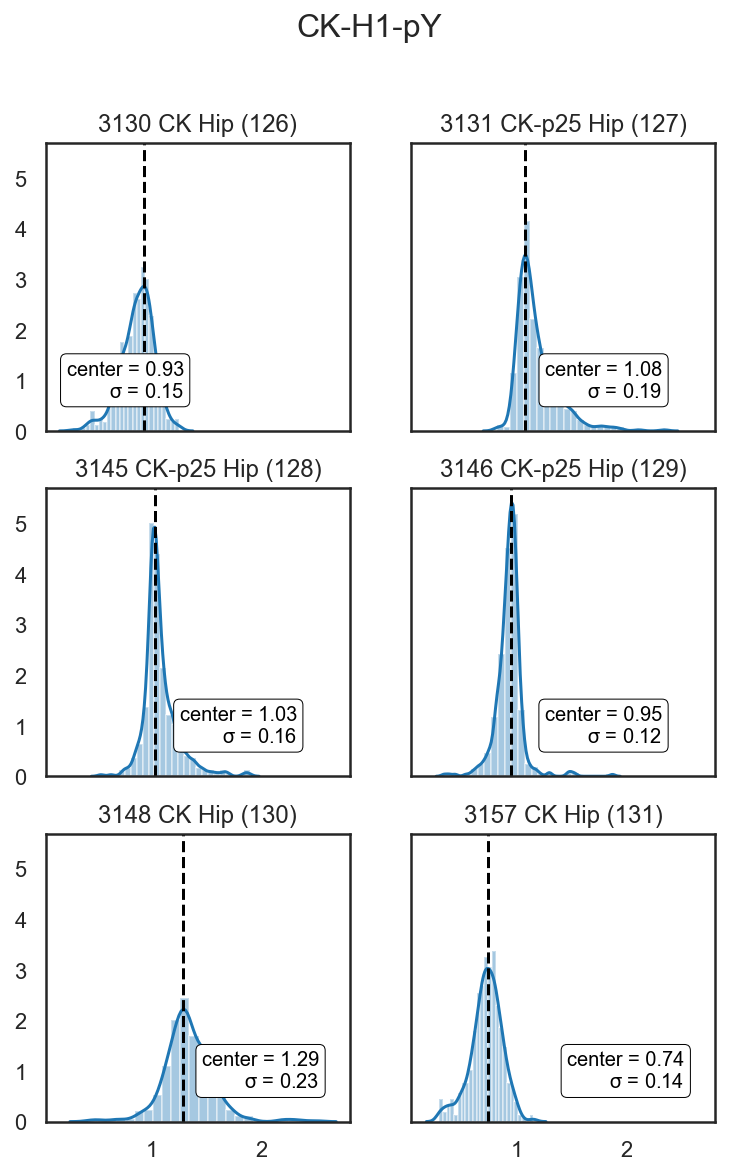

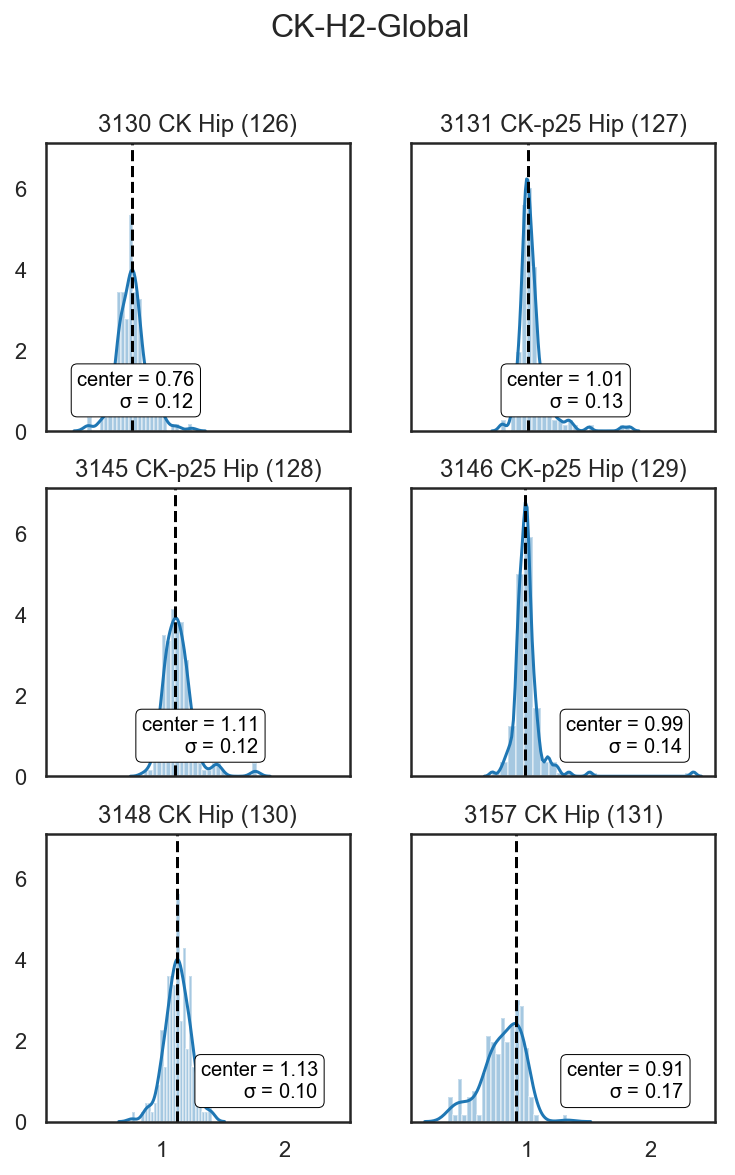

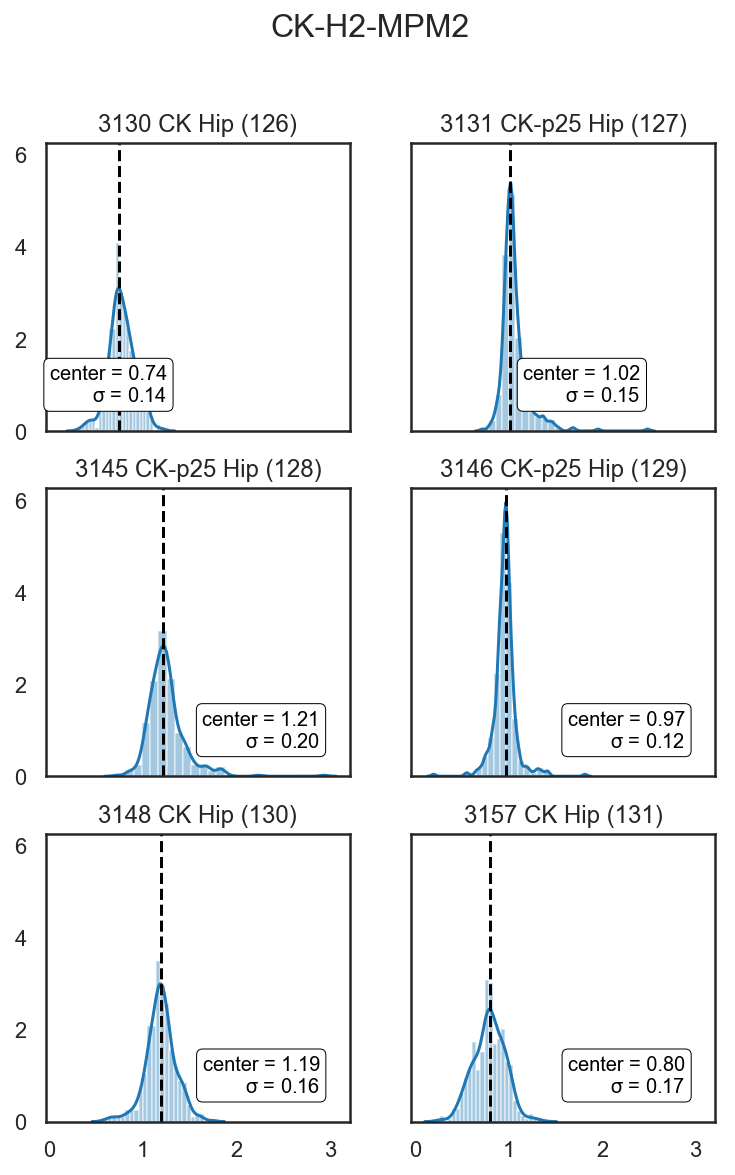

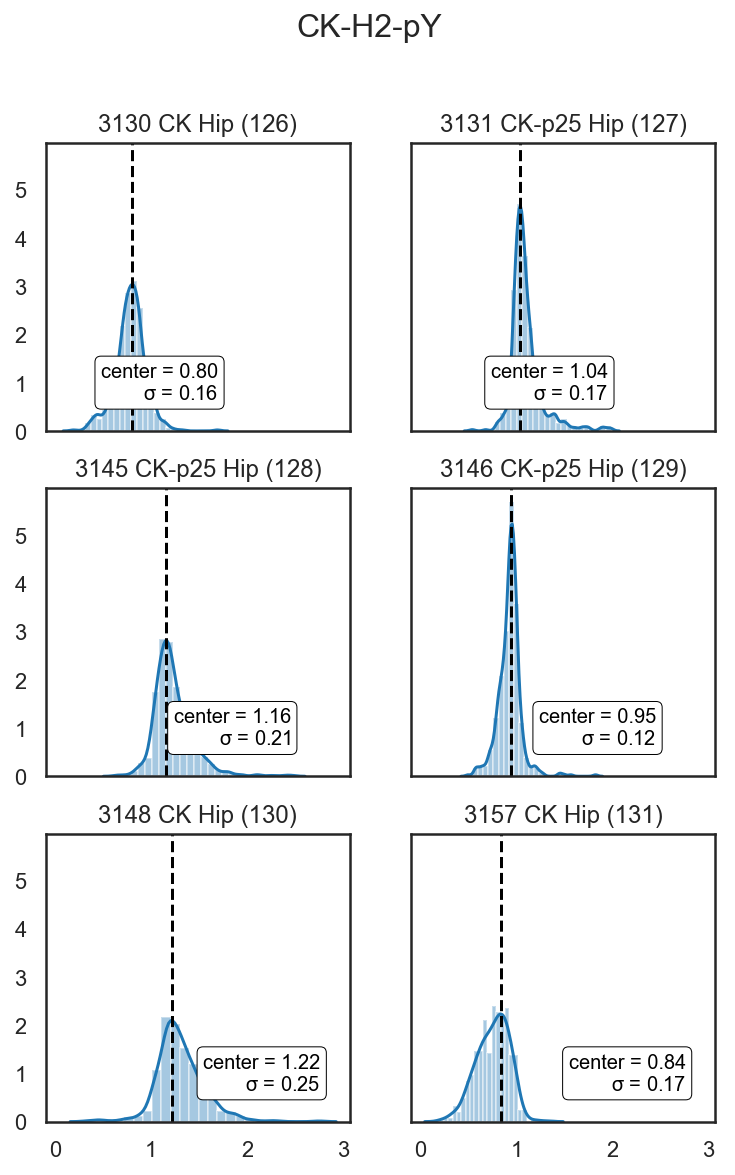

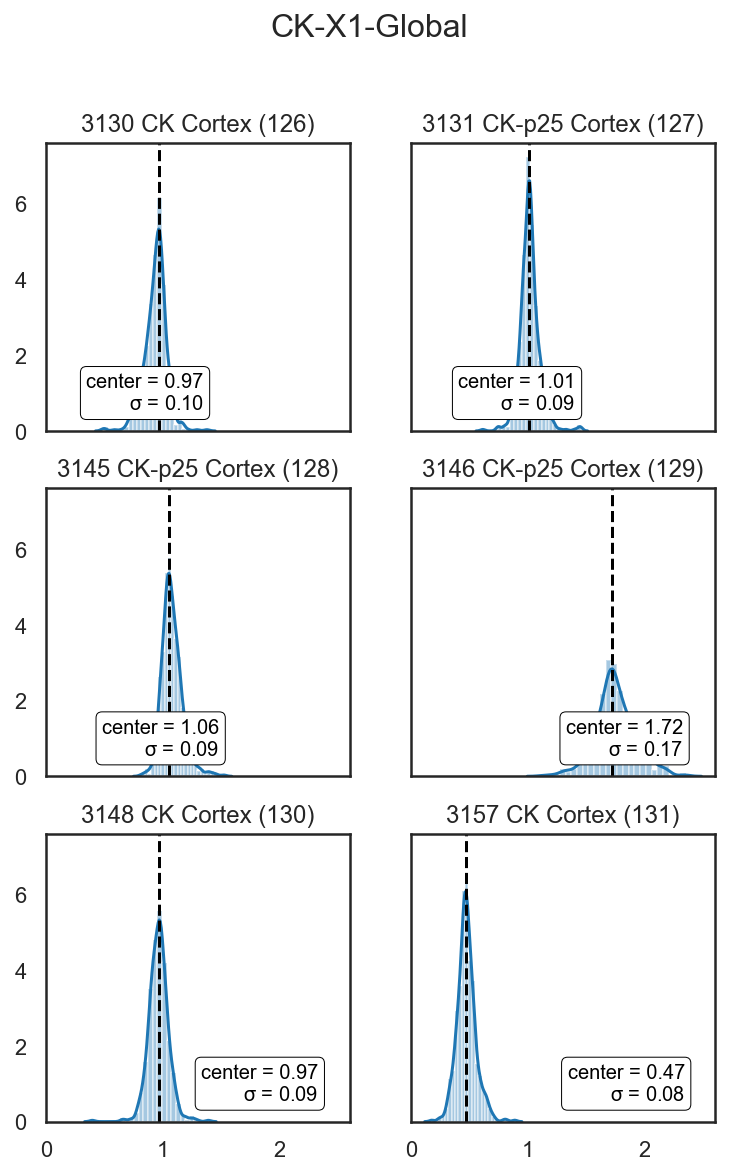

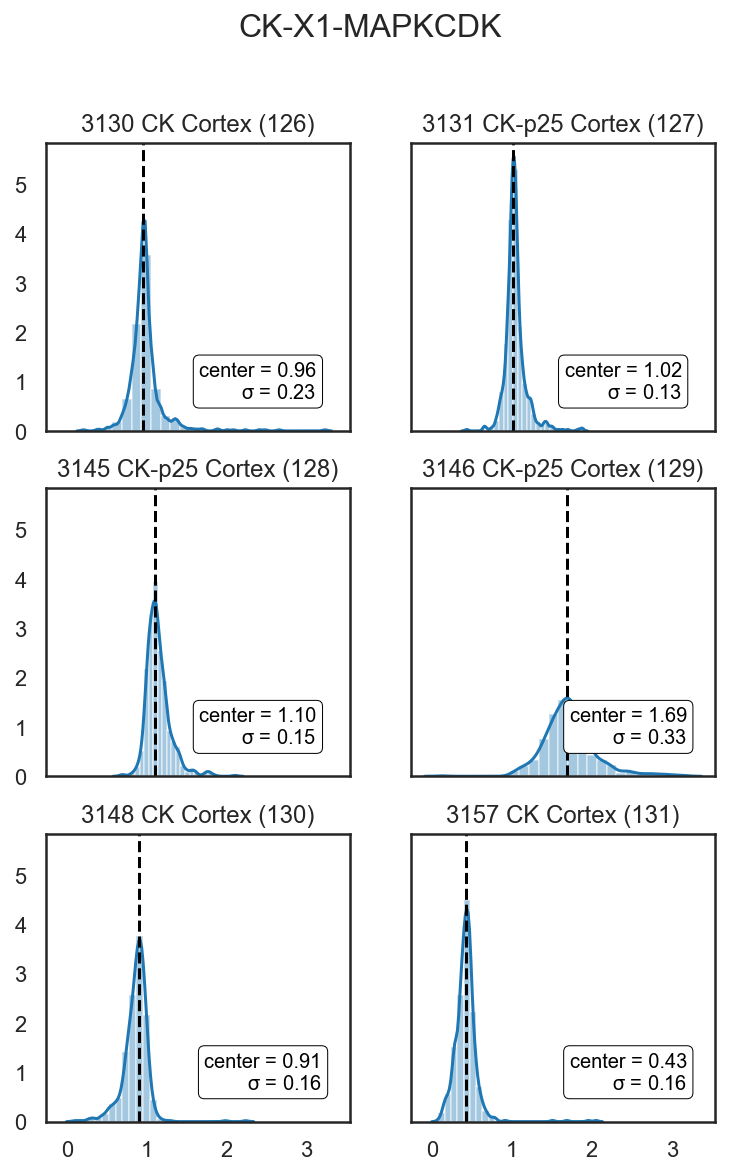

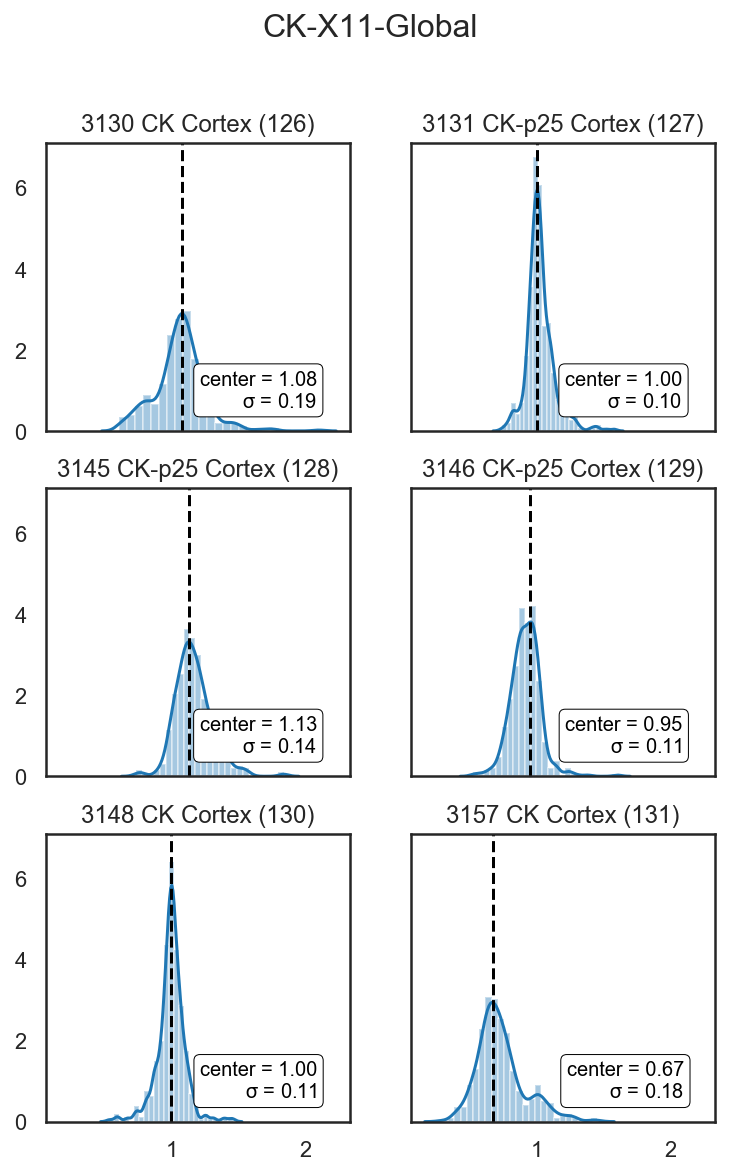

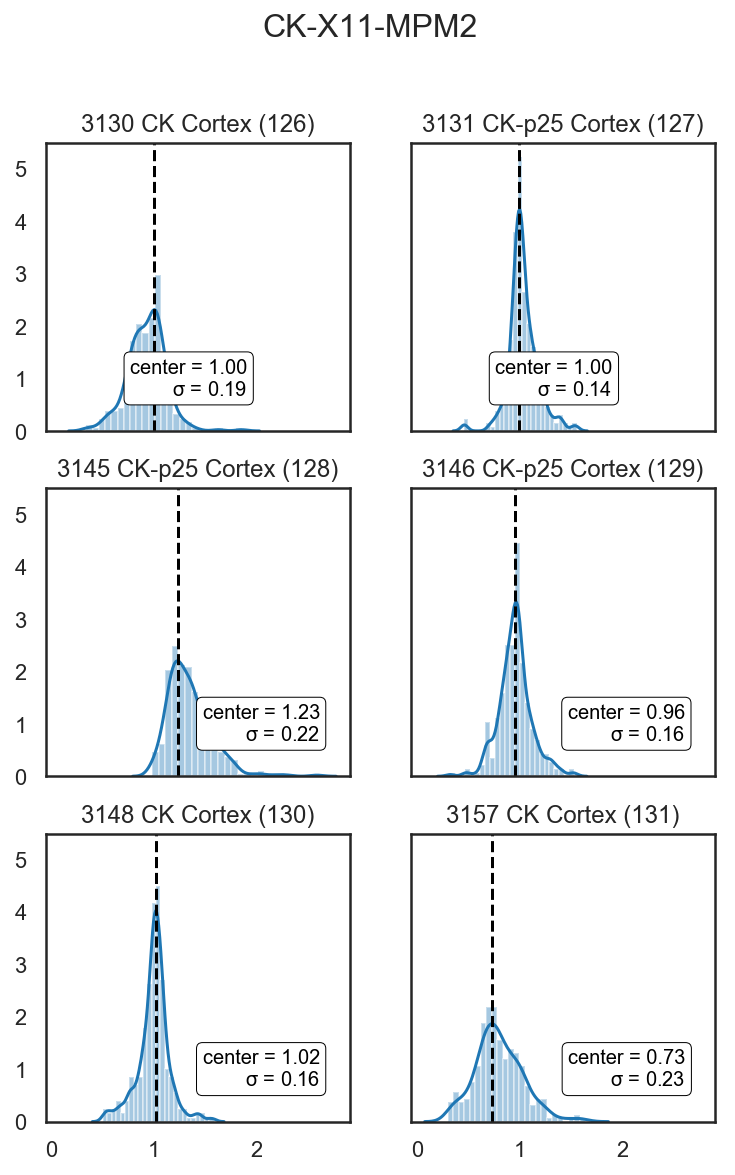

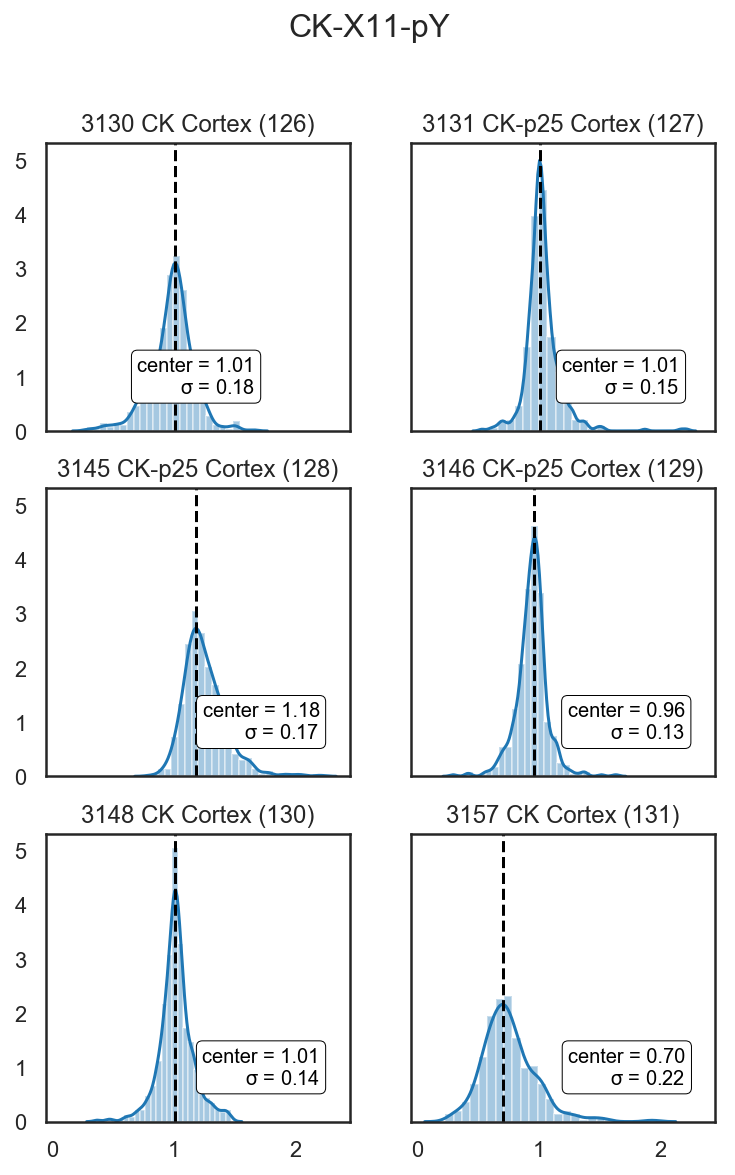

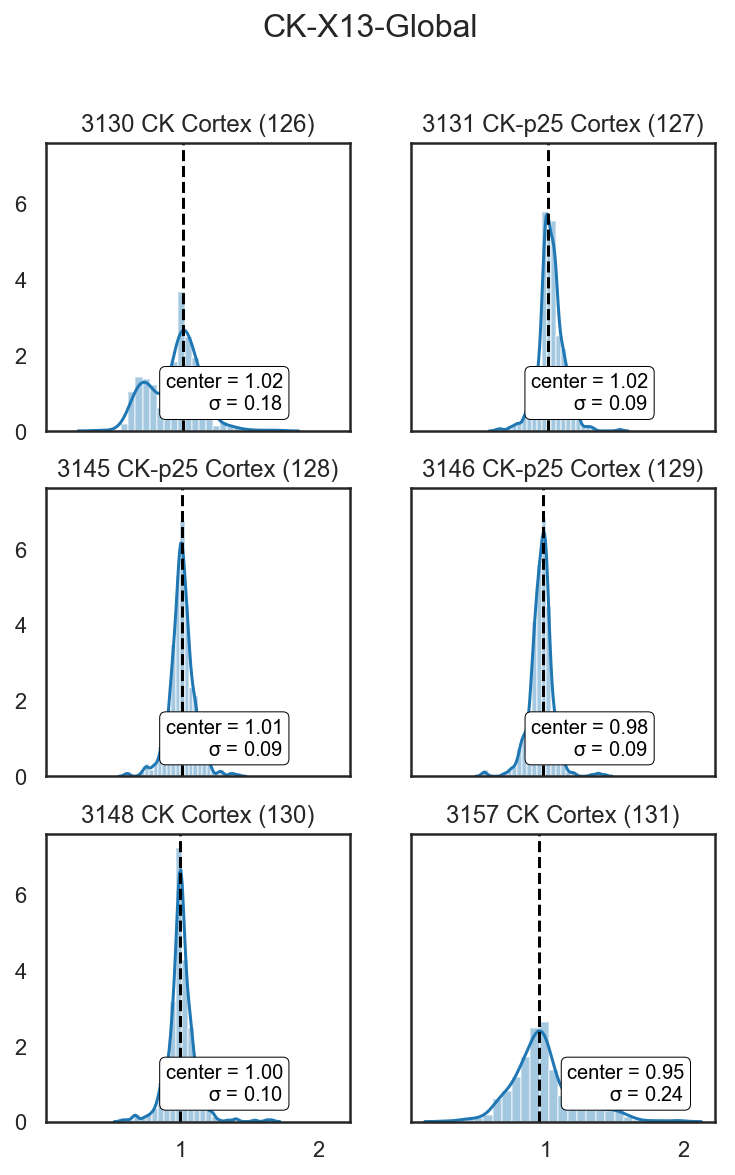

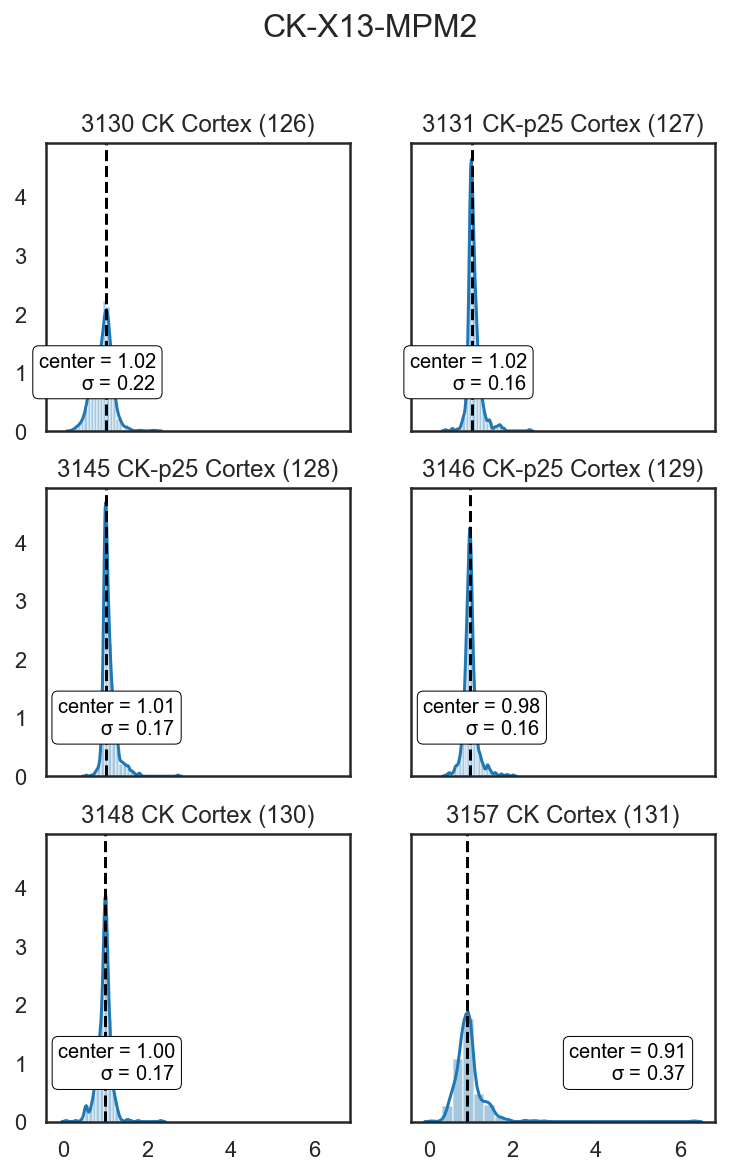

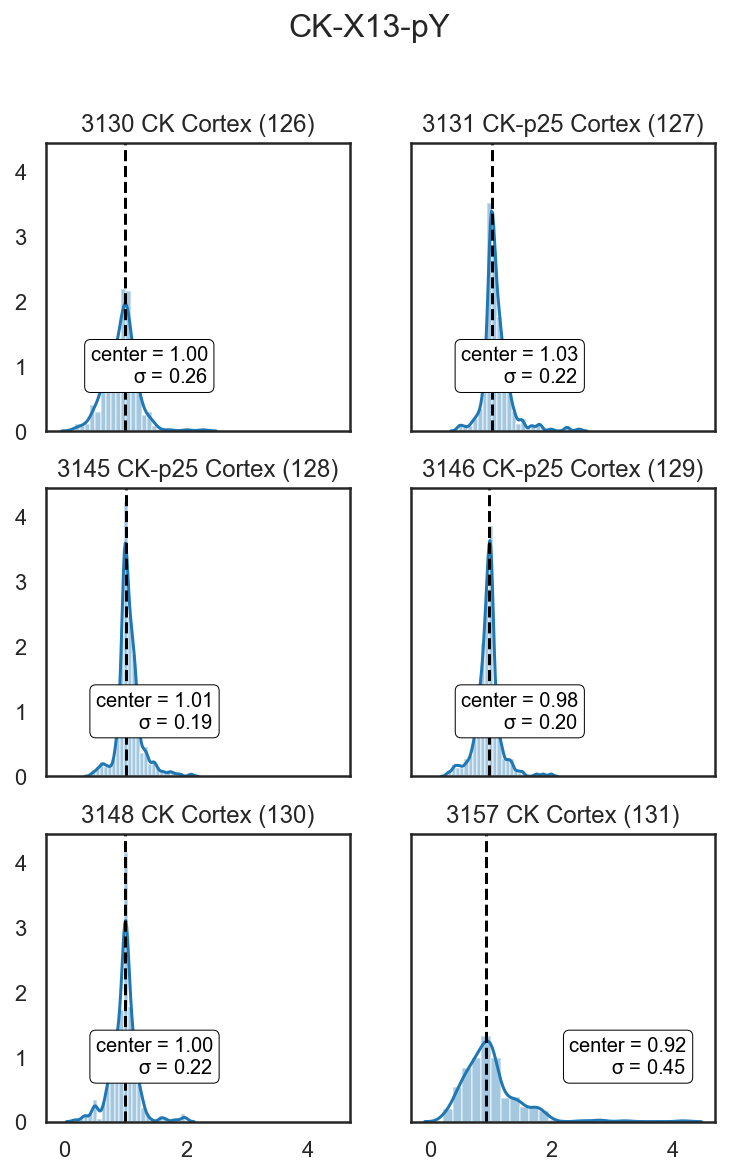

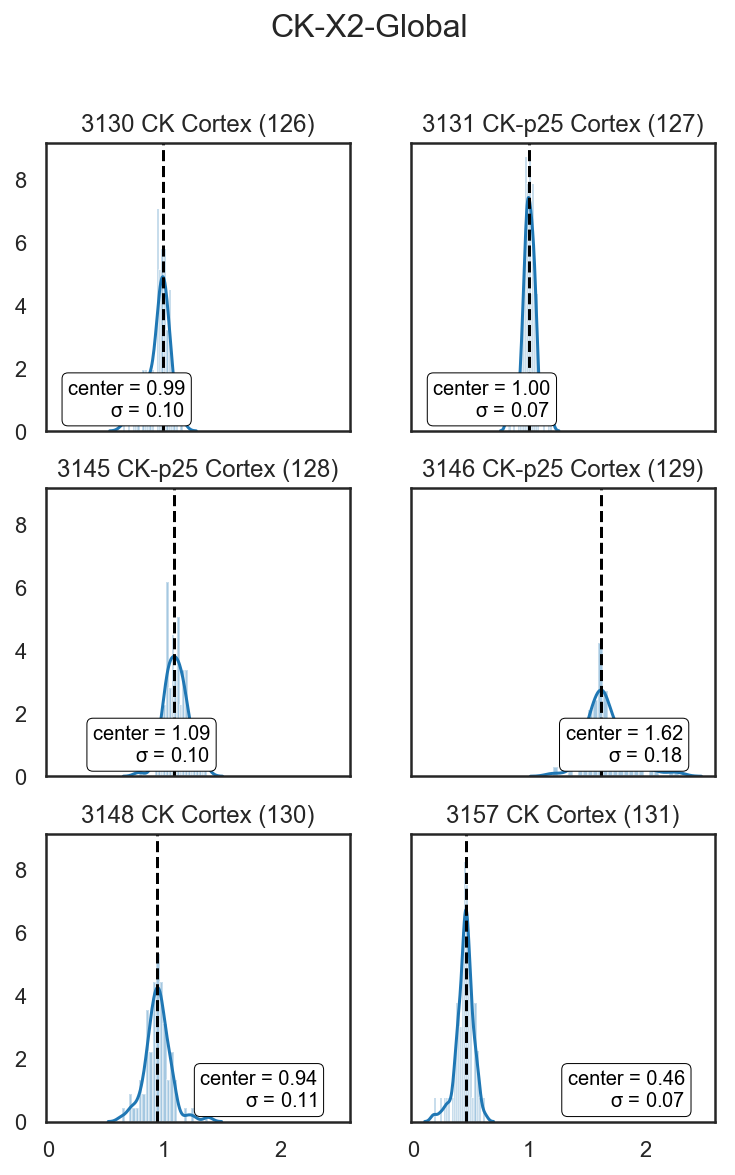

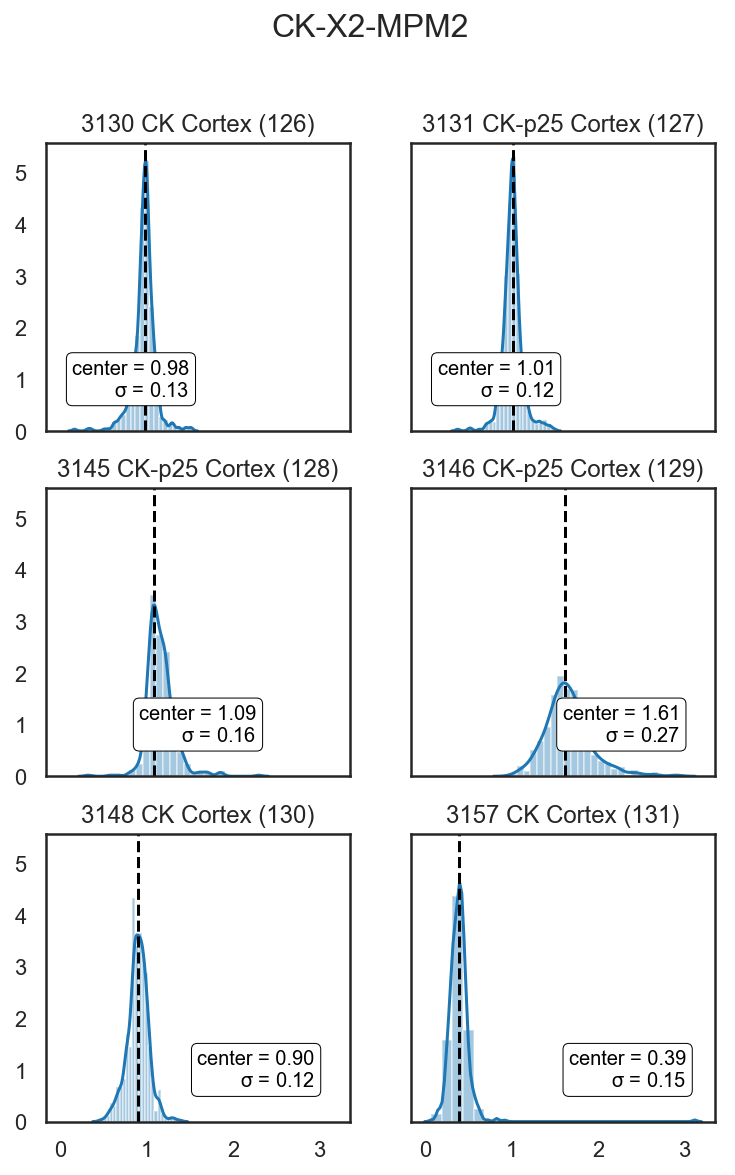

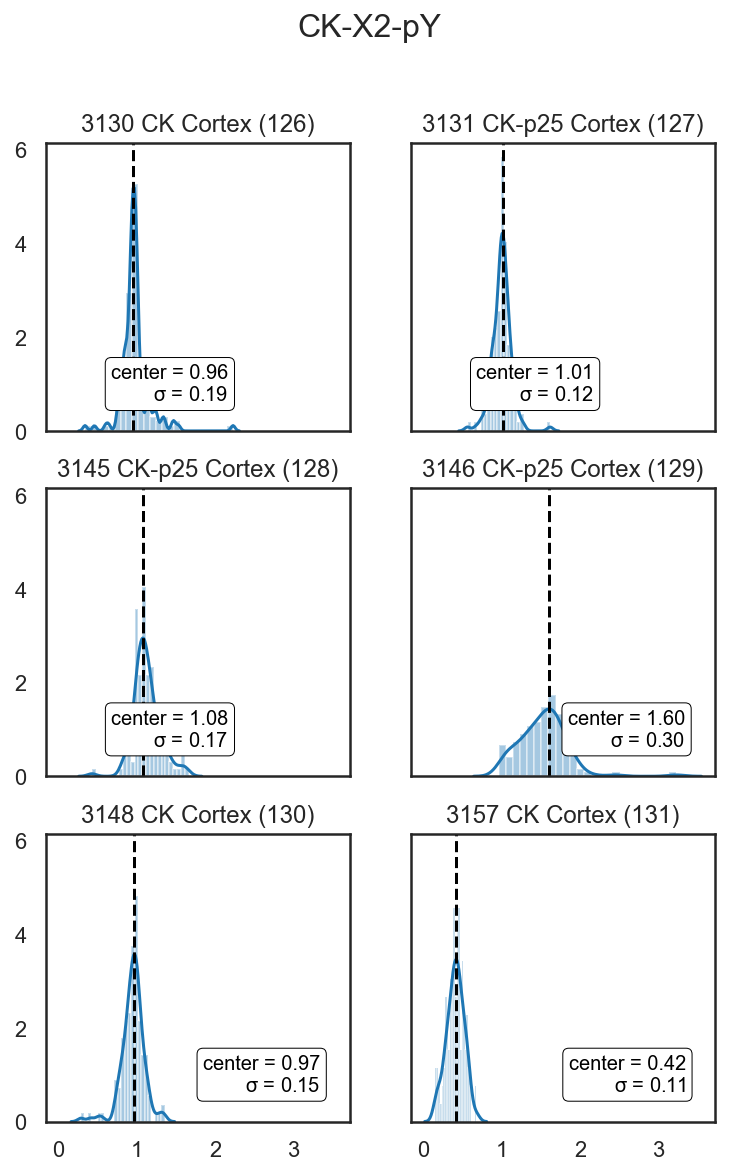

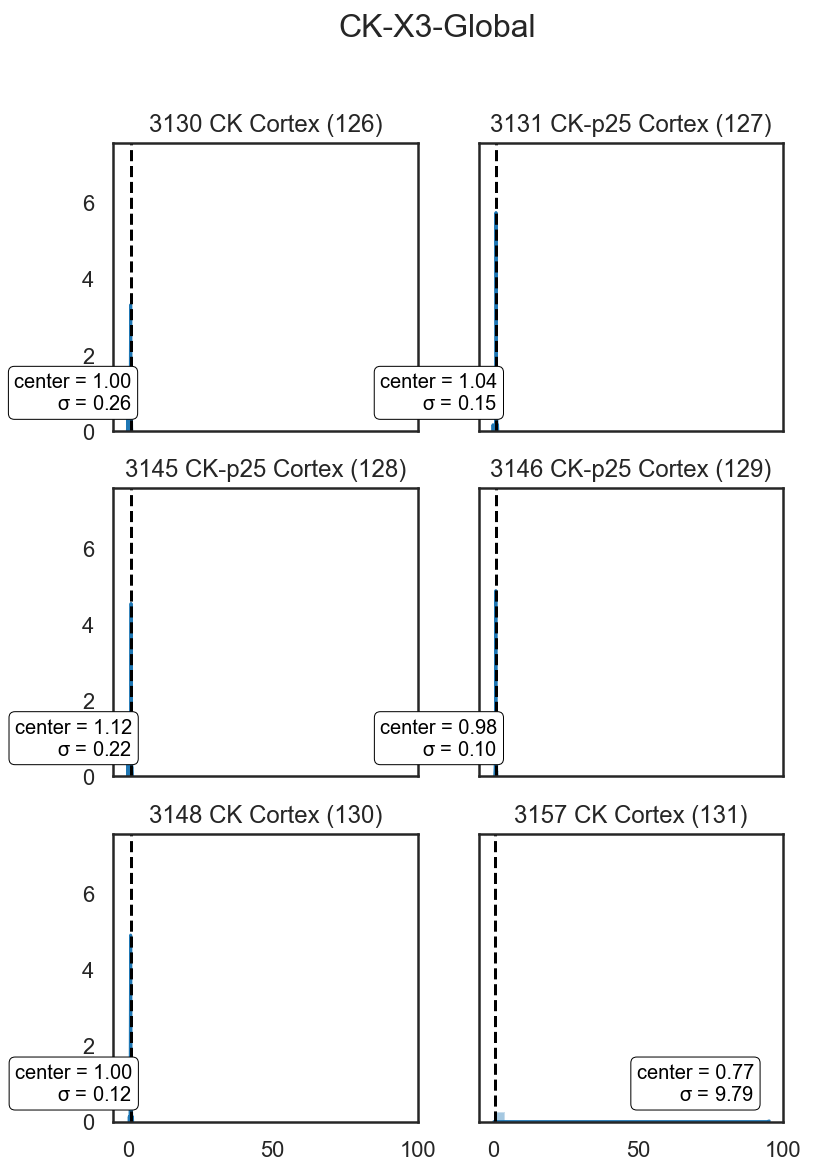

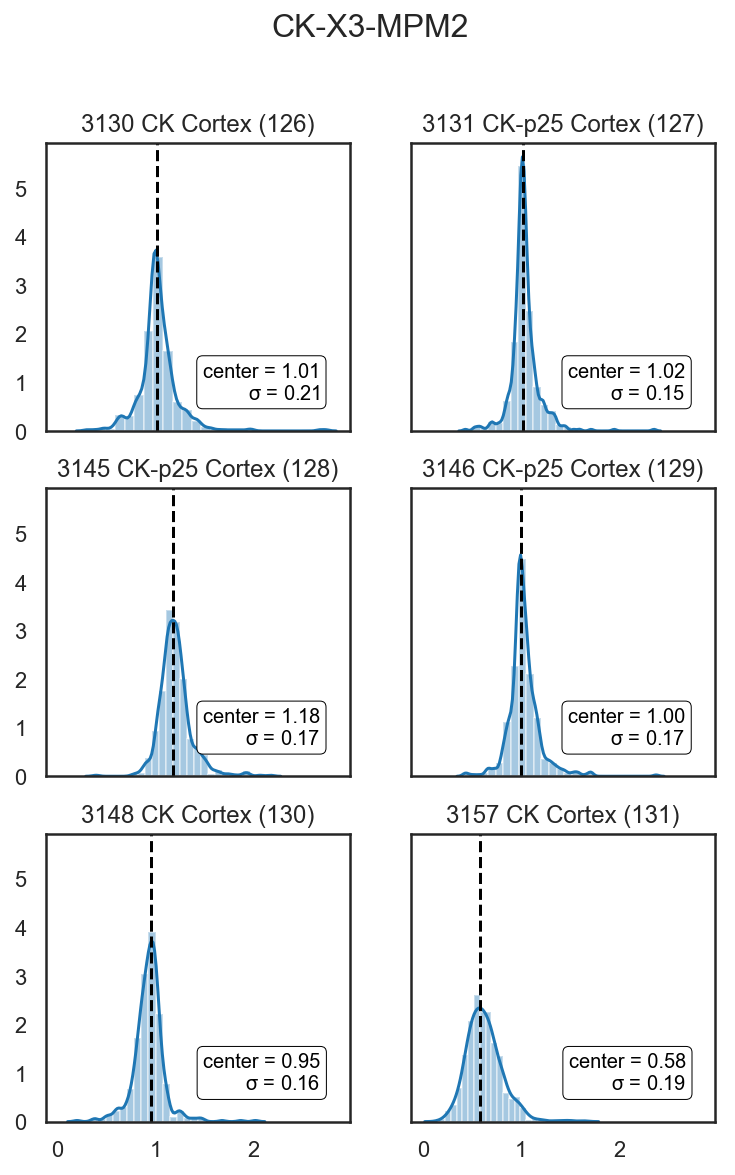

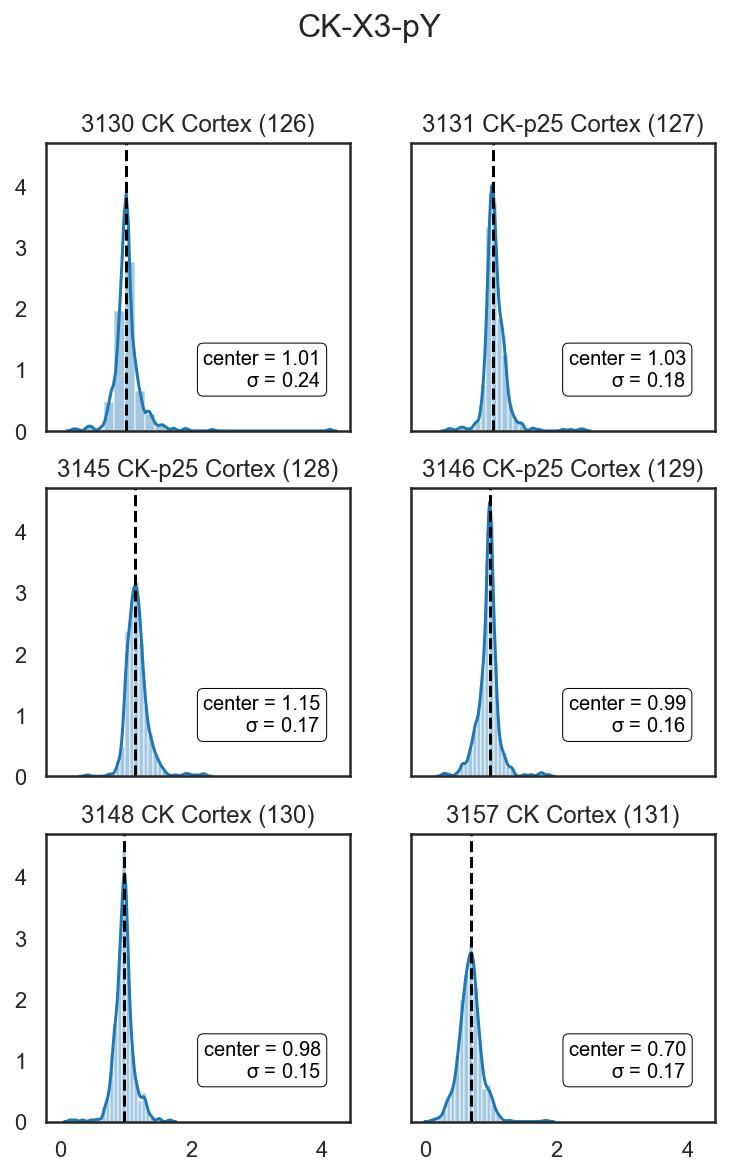

In [3]:
# Import, normalize, and merge together datasets
datas = data_sets.load_all_data(
    chan_mapping={
        "CK-H": ckh_channels,
        "CK-X": ckx_channels,
    },
    norm_mapping="self",
    merge_mapping=OrderedDict([
        ("CKH pY", ["CK-H1-pY", "CK-H2-pY"]),
        ("CKH pST", ["CK-H1-MPM2", "CK-H1-pST", "CK-H2-MPM2"]),
        ("CKH Global", ["CK-H1-Global", "CK-H2-Global"]),
        
        ("CKX pY", ["CK-X2-pY", "CK-X3-pY", "CK-X11-pY", "CK-X13-pY"]),
        ("CKX pST", ["CK-X1-MAPKCDK", "CK-X2-MPM2", "CK-X3-MPM2", "CK-X11-MPM2", "CK-X2-MPM2", "CK-X13-MPM2"]),
        ("CKX Global", ["CK-X1-Global", "CK-X2-Global", "CK-X3-Global", "CK-X11-Global", "CK-X13-Global"]),
        
        ("CK Hip", ["CKH pY", "CKH pST", "CKH Global"]),
        ("CK Cortex", ["CKX pY", "CKX pST", "CKX Global"]),
        
        ("CK All", ["CK Hip", "CK Cortex"]),

    ]),
    groups=ckp25_groups,
)

for name in ["CK Hip", "CK Cortex", "CK All"]:
    # Normalize intensities for each Data Set to the median of each control group:
    # [Samples] /= [CK Samples].median()
    if not datas[name].cmp_groups:
        datas[name] = datas[name].norm_cmp_groups(
            cmp_groups,
        )

    # Update Fold Changes and p-values:
    # [Fold Change] = [CK-p25 Samples].mean() / [CK Samples].mean()
    # [p-value] = ttest_ind([CK-p25 Samples], [CK Samples])
    datas[name].update_group_changes(
        group_a=ck_groups,
        group_b=wt_groups,
    )

utils.save('CK-example-data', datas)

In [4]:
# load_all_data returns a dictionary, mapping names to Data Sets
display(list(datas.items()))

[('CK-H1-Global', <pyproteome.data_sets.data_set.DataSet at 0x2085ee2d128>),
 ('CK-H1-MPM2', <pyproteome.data_sets.data_set.DataSet at 0x2085ee2d160>),
 ('CK-H1-pST', <pyproteome.data_sets.data_set.DataSet at 0x2085f315278>),
 ('CK-H1-pY', <pyproteome.data_sets.data_set.DataSet at 0x2085f76b198>),
 ('CK-H2-Global', <pyproteome.data_sets.data_set.DataSet at 0x20860c3b8d0>),
 ('CK-H2-MPM2', <pyproteome.data_sets.data_set.DataSet at 0x208611f2c18>),
 ('CK-H2-pY', <pyproteome.data_sets.data_set.DataSet at 0x2086138e630>),
 ('CK-X1-Global', <pyproteome.data_sets.data_set.DataSet at 0x208612ca978>),
 ('CK-X1-MAPKCDK', <pyproteome.data_sets.data_set.DataSet at 0x208612e3908>),
 ('CK-X11-Global', <pyproteome.data_sets.data_set.DataSet at 0x208629636a0>),
 ('CK-X11-MPM2', <pyproteome.data_sets.data_set.DataSet at 0x20860add358>),
 ('CK-X11-pY', <pyproteome.data_sets.data_set.DataSet at 0x208610d2e80>),
 ('CK-X13-Global', <pyproteome.data_sets.data_set.DataSet at 0x2085f2b0c50>),
 ('CK-X13-MPM2'

In [5]:
# Peptide-Spectra Information is stored in the .psms attribute of each Data Set
display(list(datas['CK Hip'].psms.columns))
datas['CK Hip'].psms.iloc[:2]

['Proteins',
 'Sequence',
 '3130 CK Hip_weight',
 '3130 CK Hip',
 '3131 CK-p25 Hip_weight',
 '3131 CK-p25 Hip',
 '3145 CK-p25 Hip_weight',
 '3145 CK-p25 Hip',
 '3146 CK-p25 Hip_weight',
 '3146 CK-p25 Hip',
 '3148 CK Hip_weight',
 '3148 CK Hip',
 '3157 CK Hip_weight',
 '3157 CK Hip',
 'Modifications',
 'Missed Cleavages',
 'Validated',
 'Scan Paths',
 'Raw Paths',
 'Ambiguous',
 'Masses',
 'Charges',
 'Intensities',
 'RTs',
 'Scan',
 'Ion Score',
 'q-value',
 'Confidence Level',
 'Isolation Interference',
 'Fold Change',
 'p-value']

,Proteins,Sequence,3130 CK Hip_weight,3130 CK Hip,3131 CK-p25 Hip_weight,3131 CK-p25 Hip,3145 CK-p25 Hip_weight,3145 CK-p25 Hip,3146 CK-p25 Hip_weight,3146 CK-p25 Hip,...,Charges,Intensities,RTs,Scan,Ion Score,q-value,Confidence Level,Isolation Interference,Fold Change,p-value
0,"(Spectrin alpha chain, non-erythrocytic 1 (Sptan1))",LDDSyR,158122.870718,1.314529,160086.305062,1.329784,87239.392476,0.723044,109933.059201,0.911473,...,{2},"{320385.90625, 160980.46875, 470980.0625, 459527.125}","{46.376513, 35.87373, 36.409328, 46.894693}","{7673, 7763, 6220, 6131}",16.70,0.0,High,0.000000,0.933439,0.768731
1,(Ankyrin repeat and sterile alpha motif domain-containing protein 1B (Anks1b)),yETTIF,24818.862763,1.031515,26070.651487,1.083542,20945.666985,0.870538,20010.917145,0.831689,...,{2},{457607.6875},{121.30872},{20234},23.61,0.0,High,7.537166,0.923902,0.390666


05:36:10 PM	pyproteome.volcano	INFO	Plotting volcano labels for 4 peptides


(<Figure size 432x432 with 1 Axes>,
 'C:\\Users\\Nader\\Dropbox (MIT)\\White Lab\\CK-p25 Mice\\Figures\\CK All\\Volcano',
 'CK_All.png')

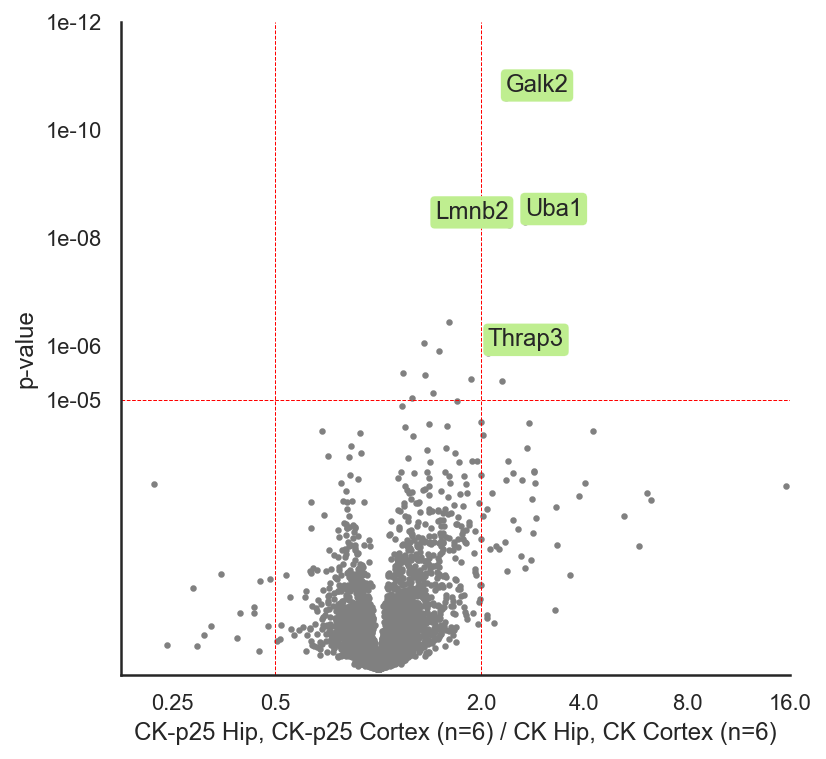

In [6]:
# Show a volcano plot
volcano.plot_volcano(
    datas["CK All"],
    p=1e-5,
    fold=2,
)

05:36:12 PM	pyproteome.correlation	INFO	Plotting dataset correlation


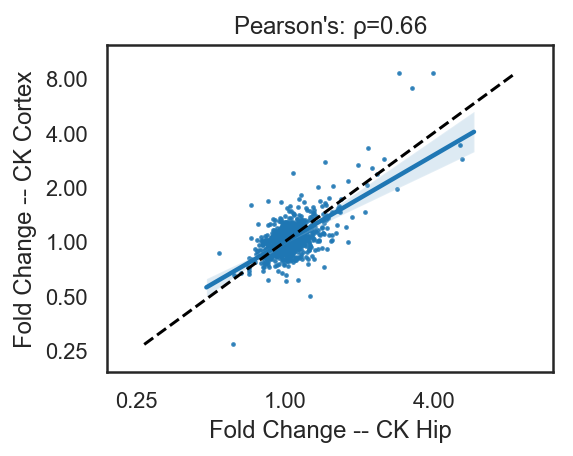

In [7]:
# Plot the correlation between Fold Changes of peptides in two data sets
correlation.correlate_data_sets(
    datas["CK Hip"],
    datas["CK Cortex"],
)

05:36:14 PM	brainrnaseq.plot	INFO	Plotting cell type enrichments


(<Figure size 288x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2087394d780>)

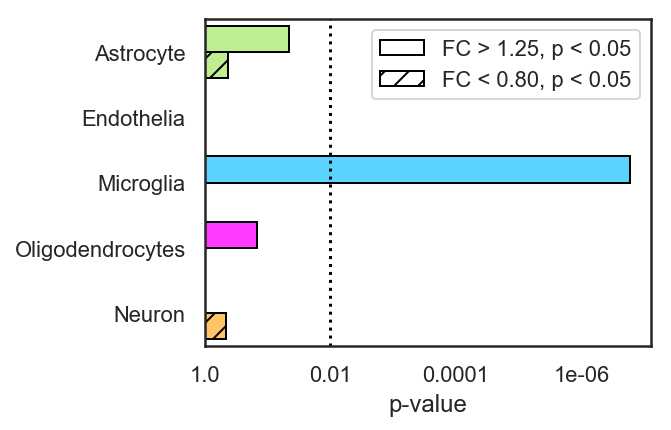

In [8]:
# Run cell type enrichment on up/down-regulated peptides
brs.plot.plot_cell_enrichments(
    datas['CK Hip'],
    [
        {'p': .05, 'asym_fold': 1.25},
        {'p': .05, 'asym_fold': 1/1.25},
    ],
)

05:36:19 PM	pyp.motifs.logo	INFO	Generating motif logo


(<Figure size 432x288 with 1 Axes>,
 (<matplotlib.axes._axes.Axes at 0x20865c56b00>,
  <matplotlib.axes._axes.Axes at 0x20865c594e0>))

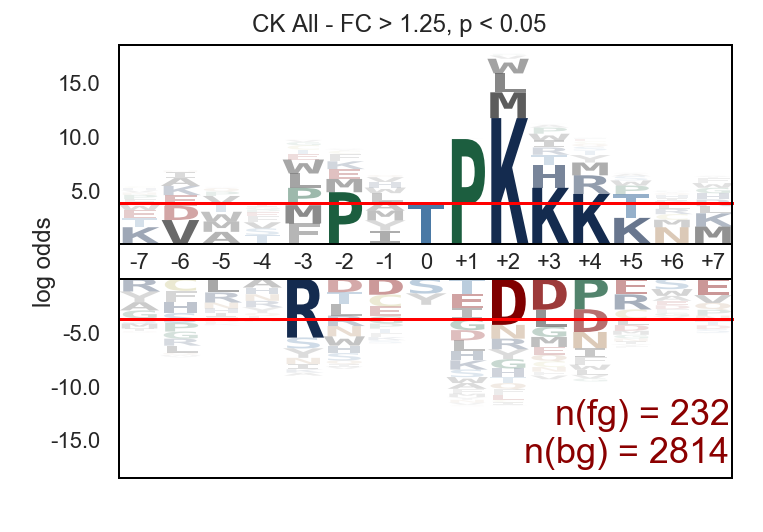

In [9]:
# Show a motif logo for upregulated phosphosites
logo.make_logo(
    datas["CK All"].filter(ambiguous=False),
    {
        'asym_fold': 1.25,
        'p': .05,
    },
)

05:36:22 PM	pyproteome.pathways	INFO	Filtering ambiguous peptides (1045 proteins)
05:36:22 PM	pyproteome.pathways	INFO	Filtered down to 860 proteins
05:36:22 PM	pyproteome.pathways	INFO	Building list of individual phosphosites
05:36:22 PM	pyproteome.pathways	INFO	Building gene sets (psites=True, remap=True)
05:36:22 PM	pyproteome.phosphosite	INFO	Getting phosphosite data for Mus musculus
05:36:22 PM	pyproteome.phosphosite	INFO	Remapping sites to species: mouse
05:36:22 PM	pyproteome.phosphosite	INFO	Fetching Phosphosite Plus mapping data
05:37:13 PM	pyproteome.pathways	INFO	Loaded 374 gene sets
05:37:13 PM	pyproteome.pathways	INFO	Building correlations using metric 'zscore'
05:37:13 PM	pyproteome.enrichments	INFO	Calculating ranks
05:37:13 PM	pyproteome.enrichments	INFO	Getting gene correlations (1584 IDs)
05:37:13 PM	pyproteome.enrichments	INFO	Filtering gene sets
05:37:13 PM	pyproteome.enrichments	INFO	Filtered 374 gene sets down to 11 with ≥ 15 genes present
05:37:13 PM	pyproteome.e

,name,ES(S),NES(S),p-value,q-value
215,CDK5,0.655638,1.529507,0.000000,0.035831
205,GSK3B,0.620110,1.391948,0.020833,0.134365
2,PKACA,0.571438,1.385827,0.032787,0.101520
325,ERK2,0.579494,1.380849,0.000000,0.080619
130,CDK1,0.598378,1.354175,0.032258,0.085993
122,ERK1,0.556188,1.304293,0.072727,0.122421
67,Src,0.613330,1.301888,0.040816,0.104933
281,Fyn,0.574868,1.268788,0.096774,0.120928
192,CAMK2A,0.521062,1.123207,0.265625,0.346363
162,CK2A1,0.464124,1.089384,0.298246,0.376221


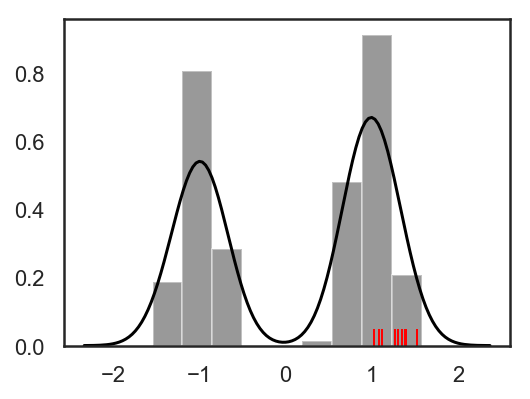

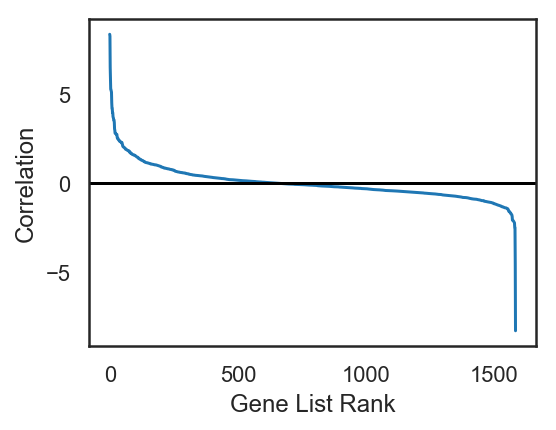

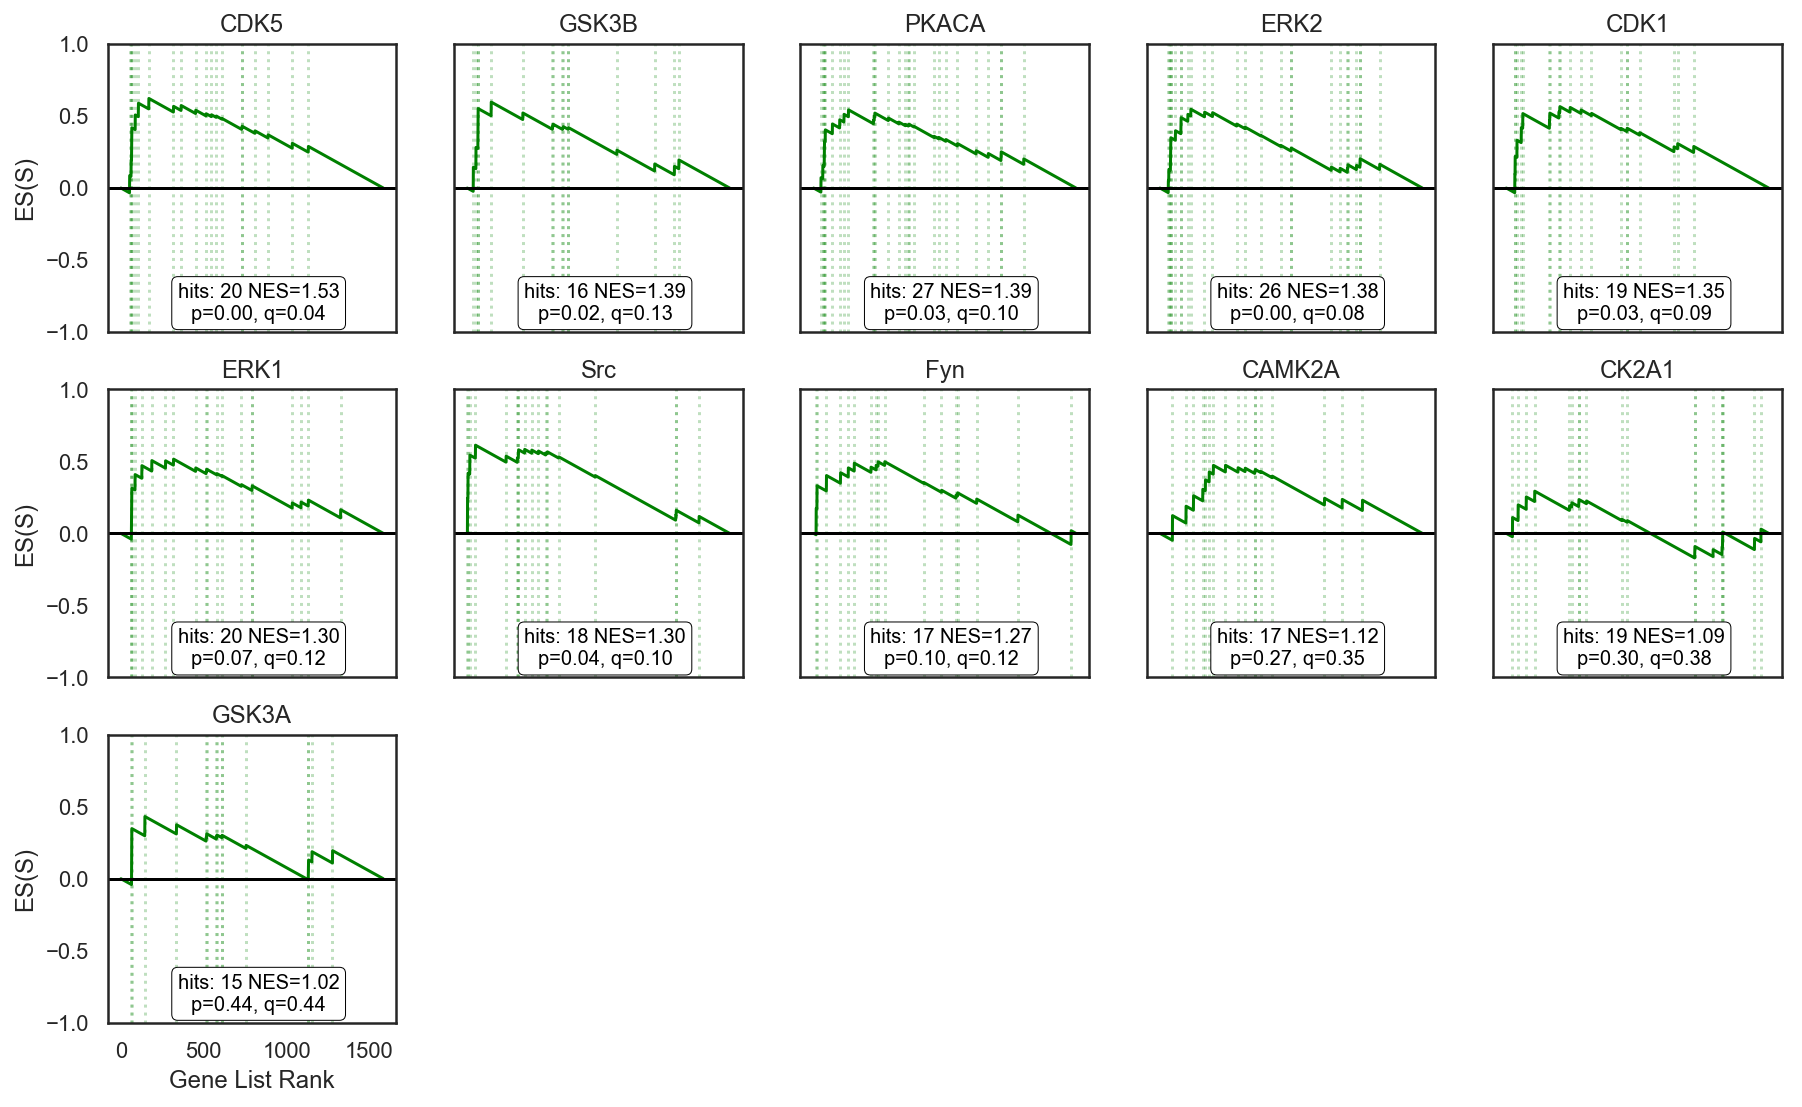

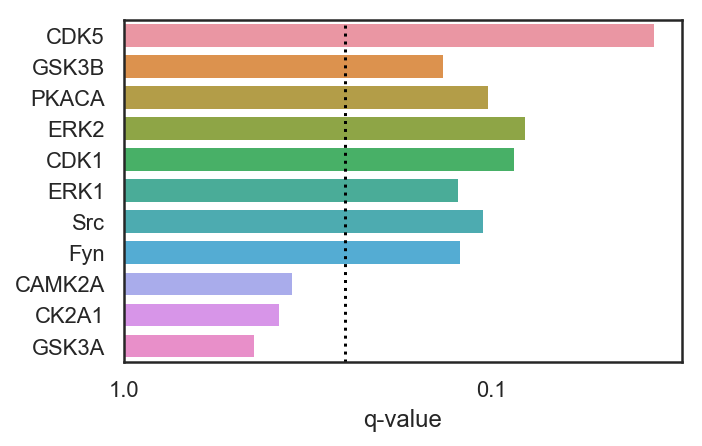

In [10]:
# Run Phosphosite Enrichment analysis
psea_results = pathways.psea(
    ds=datas["CK Hip"],
    min_hits=15,
    pval=True,
    metric="zscore",
    p_iter=100,
    n_cpus=7,
)
psea_results[0][['name', 'ES(S)', 'NES(S)', 'p-value', 'q-value']]

In [11]:
# Write processed Data Sets to tabs of .xlsx file
tables.write_full_tables(
    [
        datas["CK Hip"],
        datas["CK Cortex"],
    ]
)

'C:\\Users\\Nader\\Dropbox (MIT)\\White Lab\\CK-p25 Mice\\Figures\\All\\Tables\\Full Data.xlsx'

In [12]:
# Show a list of differentially expressed peptides
tables.changes_table(
    datas['CK All'].filter(mod='S', p=1e-3, fold=2),
    sort='Fold Change'
)

,Proteins,Sequence,Fold Change,p-value,Validated,Uniprot Accessions
1,Brevican core protein (Bcan),ELETPsEEKSGR (pS587),0.221347,0.00036129,False,Q61361
5,Heterogeneous nuclear ribonucleoproteins C1/C2 (Hnrnpc),"QADLSFSsPVEmKNEK (pS232, oxM236)",2.81873,0.00068909,False,Q9Z204
0,Elongation factor 2 (Eef2),FSVsPVVR (pS502),2.72074,8.02264e-05,False,P58252
4,V-type proton ATPase subunit H (Atp6v1h),LEWsPVHK (pS367),2.62388,0.00031103,False,Q8BVE3
2,N-acetylgalactosamine kinase (Galk2),LIEFsPLR (pS208),2.35686,2.5639e-11,False,Q68FH4
3,Transcriptional regulator ATRX (Atrx),"VcDQTSKFsPK (cmC308, pS315)",2.02704,4.58758e-05,False,Q61687


In [13]:
# Generate n-mers around serine phosphorylation sites
ds = datas['CK All'].filter(mod='S', fold=2, p=1e-3)

pd.DataFrame(
    [
        (
            str(i["Proteins"]),
            ' / '.join(i['Proteins'].genes),
            ' / '.join(i['Proteins'].accessions),
            str(i["Sequence"]),
            pyp.motifs.motif.generate_n_mers(i["Sequence"], mods='S')
        )
        for _, i in ds.psms.iterrows()
    ],
    columns=['Protein', 'Gene', 'Accession', 'Sequence', 'n-mers'],
)

,Protein,Gene,Accession,Sequence,n-mers
0,Elongation factor 2 (Eef2),Eef2,P58252,FSVsPVVR,{RVMKFSVsPVVRVAV}
1,Brevican core protein (Bcan),Bcan,Q61361,ELETPsEEKSGR,{PRELETPsEEKSGRT}
2,N-acetylgalactosamine kinase (Galk2),Galk2,Q68FH4,LIEFsPLR,{TAKLIEFsPLRATNV}
3,Transcriptional regulator ATRX (Atrx),Atrx,Q61687,VcDQTSKFsPK,{CDQTSKFsPKKSSSS}
4,V-type proton ATPase subunit H (Atp6v1h),Atp6v1h,Q8BVE3,LEWsPVHK,{KSGRLEWsPVHKSEK}
5,Heterogeneous nuclear ribonucleoproteins C1/C2 (Hnrnpc),Hnrnpc,Q9Z204,QADLSFSsPVEmKNEK,{QADLSFSsPVEMKNE}
